### Figure 3 - Ice Surface Elevation

Ice surface elevation at T, T5, T10, T15, T20 and T30, relative to January 2020. Ice surface elevation extracted from ATL15 (Smith et al., 2023a), with observations provided at 3-month intervals. 

In [1]:
# IMPORT REQUIRED MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [7]:
# OPEN THE SAMPLED ATL15 OUTPUT CSV FILE 
ATL15_data = pd.read_csv(r'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_elevation_ATL15/ATL15_delta_h_sampled.csv')

# DEFINE THE ELEVATION (DELTA_H) VARIABLE FOR EACH POINT
POINT1_ELEVATION = ATL15_data['POINT_1']
POINT2_ELEVATION = ATL15_data['POINT_2']
POINT3_ELEVATION = ATL15_data['POINT_3']
POINT4_ELEVATION = ATL15_data['POINT_4']
POINT5_ELEVATION = ATL15_data['POINT_5']
POINT6_ELEVATION = ATL15_data['POINT_6']
POINT7_ELEVATION = ATL15_data['POINT_7']

# DEFINE THE DATE VARIABLE
ATL15_data['DATE'] = pd.to_datetime(ATL15_data['DATE'], format='%d/%m/%Y')

# INPUT DESIRED X AXIS, Y AXIS, AND PLOT TITLES
xtitle = 'Year'
ytitle = 'Ice surface elevation \n relative to 01/2020 (m)'

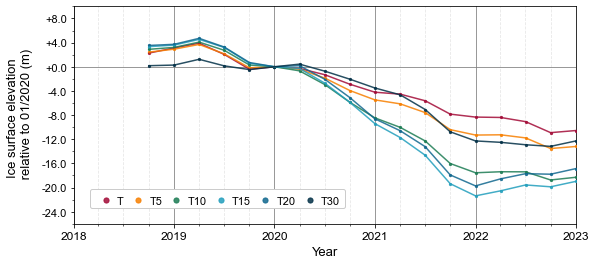

In [25]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(9, 4))
plt.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax.xaxis.grid(True, which='minor', linestyle='--', alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) # Add a horizontal line at 0.
plt.ylabel(ytitle, labelpad=8, fontsize=13)
plt.xlabel(xtitle, labelpad=5, fontsize=13)

# PLOT A SCATTER PLOT FOR EACH POINT
sc1 = plt.scatter(ATL15_data['DATE'], POINT1_ELEVATION, color='#a30b37', s=5, marker='o', alpha=0.85, label='T', zorder=20)
sc2 = plt.scatter(ATL15_data['DATE'], POINT2_ELEVATION, color='#f77f00', s=5, marker='o', alpha=0.85, label='T5', zorder=20)
sc3 = plt.scatter(ATL15_data['DATE'], POINT3_ELEVATION, color='#1c7c54', s=5, marker='o', alpha=0.85, label='T10', zorder=20)
sc4 = plt.scatter(ATL15_data['DATE'], POINT4_ELEVATION, color='#219ebc', s=5, marker='o', alpha=0.85, label='T15', zorder=20)
sc5 = plt.scatter(ATL15_data['DATE'], POINT5_ELEVATION, color='#10678e', s=5, marker='o', alpha=0.85, label='T20', zorder=20)
sc6 = plt.scatter(ATL15_data['DATE'], POINT7_ELEVATION, color='#023047', s=5, marker='o', alpha=0.85, label='T30', zorder=20)

# PLOT A LINE PLOT FOR EACH POINT
plt.plot(ATL15_data['DATE'], POINT1_ELEVATION, color='#a30b37', alpha=0.85, label='T', zorder=20)
plt.plot(ATL15_data['DATE'], POINT2_ELEVATION, color='#f77f00', alpha=0.85, label='T5', zorder=20)
plt.plot(ATL15_data['DATE'], POINT3_ELEVATION, color='#1c7c54', alpha=0.85, label='T10', zorder=20)
plt.plot(ATL15_data['DATE'], POINT4_ELEVATION, color='#219ebc', alpha=0.85, label='T15', zorder=20)
plt.plot(ATL15_data['DATE'], POINT5_ELEVATION, color='#10678e', alpha=0.85, label='T20', zorder=20)
plt.plot(ATL15_data['DATE'], POINT7_ELEVATION, color='#023047', alpha=0.85, label='T30', zorder=20)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = -24
max_y_value = 8
interval_y = 4

def format_y_ticks(y, pos):
    if y >= 0:
        return f'+{y:.1f}'  # Add a '+' sign for non-negative values
    else:
        return f'{y:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
plt.ylim(bottom=min_y_value-2, top=max_y_value+2)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=2)
ax.yaxis.set_minor_locator(minor_locator)

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# ADD A LEGEND WITH THREE COLUMNS, HORIZONTAL ARRANGEMENT, AND WHITE BACKGROUND
legend = plt.legend(handles=[sc1, sc2, sc3, sc4, sc5, sc6], loc='lower left', ncol=6, columnspacing=0.3, markerscale=2.3,
                    frameon=True, framealpha=1, handletextpad=0.01, handleheight=0.1, fontsize=11,
                    facecolor='white', borderaxespad=0.8, borderpad=0.45, fancybox=True, bbox_to_anchor=(0.015, 0.03))
legend.set_zorder(20)
for text in legend.get_texts():
    text.set_va('center')

#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_3.png', dpi=300)